# Visualizing Precipitation Data
### Here I will visualize precipitation data from Watsonville, CA from the years 1908-2013. I want to plot the whole record as a time series to gain big picture insights. Then, I want to plot monthly averages to gain insights about the rainy season during the year.

In [1]:
import pandas as pd
import numpy as np

### I've uploaded the precipitation csv to github and will be pulling the data from the link below. Precipitation is in inches.

In [2]:
url = 'https://raw.githubusercontent.com/d-alvear/practice/master/watsonville_precip.csv'
precip = pd.read_csv(url)
precip.head()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
0,1908,3.31,2.95,0.84,0.52,0.49,0.04,0.0,0.0,0.00,0.68,2.20,3.24
1,1909,14.10,7.39,4.12,0.00,0.00,0.10,0.0,0.0,0.44,0.79,1.80,10.41
2,1910,3.71,1.75,2.79,0.31,0.04,0.00,0.0,0.0,0.21,0.71,0.68,1.44
3,1911,13.37,4.44,5.61,1.30,0.34,0.09,0.0,0.0,0.00,1.71,0.50,3.20
4,1912,2.54,0.47,3.75,2.78,1.64,0.14,0.0,0.0,0.66,0.47,0.79,0.44


### For the purposes of plotting this data, I want the 'YEAR' column as the dataframe index

In [3]:
precip.set_index('YEAR', inplace = True)
precip.head()

,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
YEAR,,,,,,,,,,,,
1908,3.31,2.95,0.84,0.52,0.49,0.04,0.0,0.0,0.00,0.68,2.20,3.24
1909,14.10,7.39,4.12,0.00,0.00,0.10,0.0,0.0,0.44,0.79,1.80,10.41
1910,3.71,1.75,2.79,0.31,0.04,0.00,0.0,0.0,0.21,0.71,0.68,1.44
1911,13.37,4.44,5.61,1.30,0.34,0.09,0.0,0.0,0.00,1.71,0.50,3.20
1912,2.54,0.47,3.75,2.78,1.64,0.14,0.0,0.0,0.66,0.47,0.79,0.44


### First, I want to plot the whole record to get a time series of precipitation. In the cell below, I add a 'Total' column to get precipitation totals for each year. Since this is a large dataset (over 100 years), plotting as a line/time series will be a clean way to visualize the overal record of precipitation

In [4]:
precip_totals = precip
precip_totals['Total'] = precip.sum(axis = 1)
precip_totals.head()

,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,Total
YEAR,,,,,,,,,,,,,
1908,3.31,2.95,0.84,0.52,0.49,0.04,0.0,0.0,0.00,0.68,2.20,3.24,14.27
1909,14.10,7.39,4.12,0.00,0.00,0.10,0.0,0.0,0.44,0.79,1.80,10.41,39.15
1910,3.71,1.75,2.79,0.31,0.04,0.00,0.0,0.0,0.21,0.71,0.68,1.44,11.64
1911,13.37,4.44,5.61,1.30,0.34,0.09,0.0,0.0,0.00,1.71,0.50,3.20,30.56
1912,2.54,0.47,3.75,2.78,1.64,0.14,0.0,0.0,0.66,0.47,0.79,0.44,13.68


### Now I'll plot the record using matplotlib

In [5]:
import matplotlib.pyplot as plt

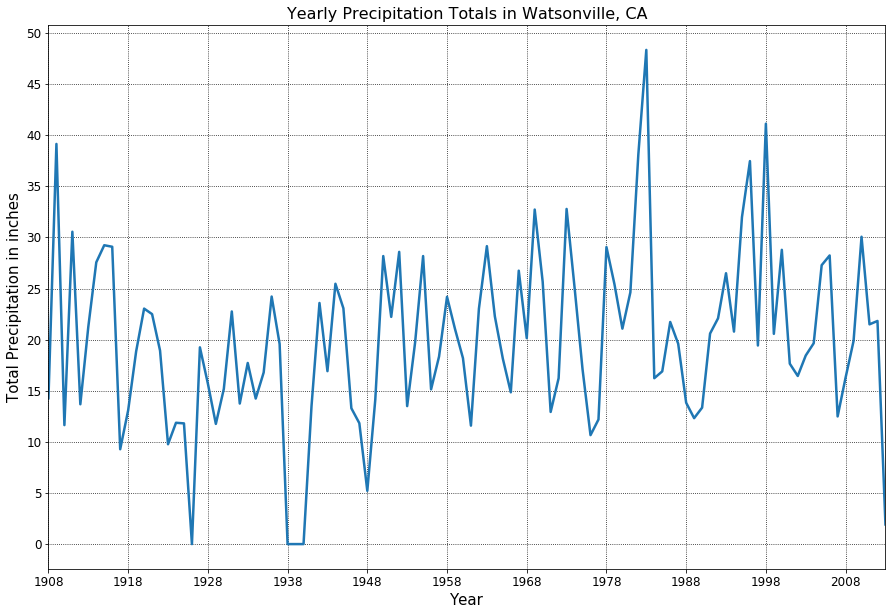

In [6]:
precip_totals['Total'].plot(kind = 'line', 
                            linewidth = 2.5, 
                            figsize = (15,10)
                           )
# I want gridlines to make it easier for the reader to extract values from the plot
plt.grid(True, linestyle = 'dotted', color = 'black')

plt.title('Yearly Precipitation Totals in Watsonville, CA', fontsize = 16)

plt.xticks(range(1908, 2013, 10), fontsize = 12)
plt.yticks(range(0, 55, 5), fontsize = 12)


plt.xlabel('Year', fontsize = 15)
plt.ylabel('Total Precipitation in inches', fontsize = 15)

plt.show()

### Now, to prepare the data so I can plot the monthly averages

In [7]:
# I transpose the data to get months as the index instead of years
precip_transposed = precip.transpose()

# I use the tail() method to check if the 'Total' column is still in the dataframe
precip_transposed.tail()

YEAR,1908,1909,1910,1911,1912,1913,1914,1915,1916,1917,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
SEP,0.00,0.44,0.21,0.00,0.66,0.05,0.00,0.00,1.42,0.00,...,0.01,0.00,0.00,0.41,0.00,0.00,0.00,0.00,0.00,0.00
OCT,0.68,0.79,0.71,1.71,0.47,0.10,1.79,0.00,1.04,0.00,...,3.51,0.17,0.10,1.23,0.35,5.31,1.62,1.87,0.35,0.00
NOV,2.20,1.80,0.68,0.50,0.79,4.19,0.97,0.48,1.20,0.84,...,1.75,0.90,1.52,0.64,1.49,0.09,3.23,2.10,4.42,0.00
DEC,3.24,10.41,1.44,3.20,0.44,8.04,7.00,7.01,6.21,0.32,...,4.87,8.77,4.10,2.73,3.29,3.57,6.67,0.04,6.09,0.00
Total,14.27,39.15,11.64,30.56,13.68,21.26,27.57,29.24,29.09,9.28,...,19.65,27.29,28.24,12.49,16.29,19.87,30.07,21.50,21.83,1.92


In [8]:
# the 'Total' row was still in the dataframe, so I need to drop it so it wont be plotted
precip_transposed.drop(['Total'], inplace = True)
precip_transposed.tail()

YEAR,1908,1909,1910,1911,1912,1913,1914,1915,1916,1917,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
AUG,0.00,0.00,0.00,0.00,0.00,0.07,0.00,0.05,0.00,0.00,...,0.00,0.00,0.00,0.00,0.03,0.00,0.09,0.03,0.00,0.0
SEP,0.00,0.44,0.21,0.00,0.66,0.05,0.00,0.00,1.42,0.00,...,0.01,0.00,0.00,0.41,0.00,0.00,0.00,0.00,0.00,0.0
OCT,0.68,0.79,0.71,1.71,0.47,0.10,1.79,0.00,1.04,0.00,...,3.51,0.17,0.10,1.23,0.35,5.31,1.62,1.87,0.35,0.0
NOV,2.20,1.80,0.68,0.50,0.79,4.19,0.97,0.48,1.20,0.84,...,1.75,0.90,1.52,0.64,1.49,0.09,3.23,2.10,4.42,0.0
DEC,3.24,10.41,1.44,3.20,0.44,8.04,7.00,7.01,6.21,0.32,...,4.87,8.77,4.10,2.73,3.29,3.57,6.67,0.04,6.09,0.0


### Now I need to calculate the mean of each month

In [9]:
precip_monthlymean = precip_transposed.mean(axis = 1)
precip_monthlymean.head()

JAN    4.127925
FEB    3.606509
MAR    2.821792
APR    1.394434
MAY    0.434528
dtype: float64

### Now I'll plot the data using matplotlib again

Text(0, 0.5, 'Precipitation in inches')

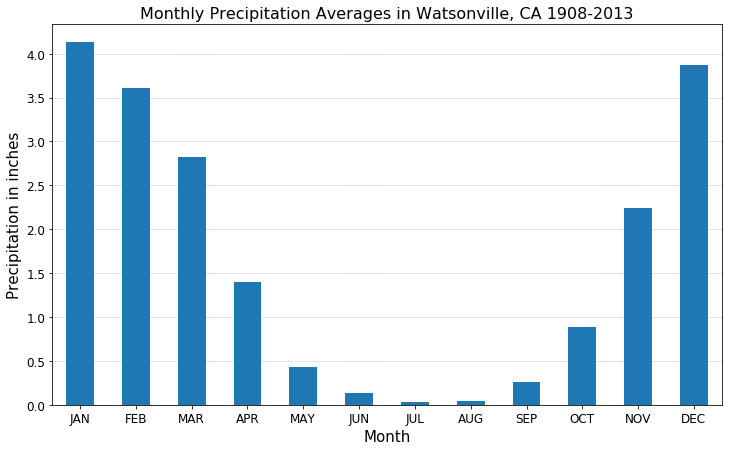

In [16]:
# need to specify 'z order' so gridlines won't be plotted on top of the bars
precip_monthlymean.plot(kind = 'bar', 
                        figsize = (12,7), 
                        zorder = 3
                           )
plt.grid(True, 'major', 'y', linestyle='dashed', linewidth=.5, alpha=1, zorder = 0)

plt.title('Monthly Precipitation Averages in Watsonville, CA 1908-2013', fontsize = 16)


plt.xticks(fontsize = 12, rotation = 'horizontal')
plt.yticks(fontsize = 12)


plt.xlabel('Month', fontsize = 15)
plt.ylabel('Precipitation in inches', fontsize = 15)

plt.show()